In [1]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import kaipy.kaiViz as kv
import matplotlib.gridspec as gridspec
import numpy as np
import kaipy.gamera.msphViz as mviz
import kaipy.remix.remix as remix
import kaipy.gamera.magsphere as msph
%matplotlib inline

## Import the Magnetosphere data

Start by importing the magnetosphere data.  You will need to set the fdir varible to the directory containing the output from a Kaiju magnetosphere run.  The ftag varible will need to be set to the name that identifies the Kaiju ouput.

In [2]:
fdir ='data/'
ftag = 'ms'

First we import the magnetospheric data.  For this example we will set the step we want to display to the final step of the run.

In [3]:
gsph = msph.GamsphPipe(fdir,ftag,doFast=False)

Initializing Earth magnetosphere
Opening pipe: /glade/scratch/wiltbemj/Gamera-test/ : msphere
Found serial database
Found 122 timesteps
	Time = [-7200.000000,7200.000000]
	Steps = [0,121]
Grid size = (96,96,128)
	Cells = 1.179648e+06
Variables (Root/Step) = (7,13)
	Root: ['Bx0', 'BxD', 'By0', 'ByD', 'Bz0', 'BzD', 'dV']
	Step: ['Bx', 'By', 'Bz', 'Cs', 'D', 'Jx', 'Jy', 'Jz', 'P', 'Pb', 'Vx', 'Vy', 'Vz']
Units Type = EARTH
Pulling grid ...
Del = (96,96,128)
Found MJD data
	Time (Min/Max) = 55252.416667/55252.583333
Found ReMIX data, reading ...


In [4]:
nstep = gsph.sFin

## Make the plots

First we will utilize the functions in msphViz to make a equatorial cut and meridonal cut of the magnetosphere data.  

As first step we need to define the limits of the region to plot [xmin,xmax,ymin,ymax]

In [5]:
xyBds = [-100,20,-60,60]

The msphViz portion of the kaipy library has numerous routines for visualizing the magnetosphere.  Here will demostrate usage of plotXY and plotXZ which make plots of the equatorial and meridonal cuts of the magnetosphere.  For both of these routines and others in system you need to provide the instance of the magnetosphere object, the step number you want to display, the extent of the domain, and two sets of axes.  The first axes object is for the plot and the second is for the colorbar.  For plotXZ we will use the minimal set arguments which results in a plot density.  For the PlotXY example we will specify options so that we end up with $V_X$ on Red/Blue color palette with a mid point normalization.

Reading msphere.gam/Step#121/D


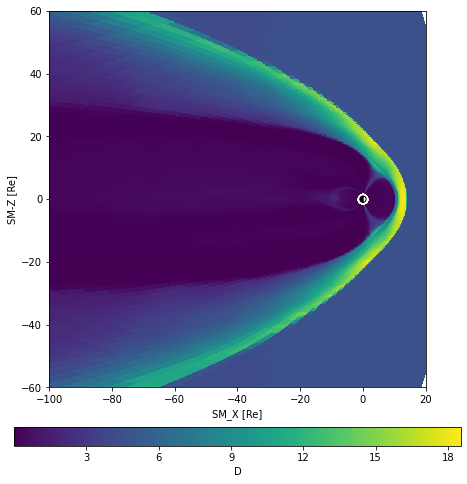

In [6]:
figSz = (8,8)
fig = plt.figure(figsize=figSz)
gs = fig.add_gridspec(2,1,height_ratios=[20,1],hspace=0.2)
Ax1 = fig.add_subplot(gs[0,0])
AxC1 = fig.add_subplot(gs[1,0])
data = mviz.plotXZ(gsph,nstep,xyBds,Ax1,AxC1)

Reading msphere.gam/Step#121/Vx


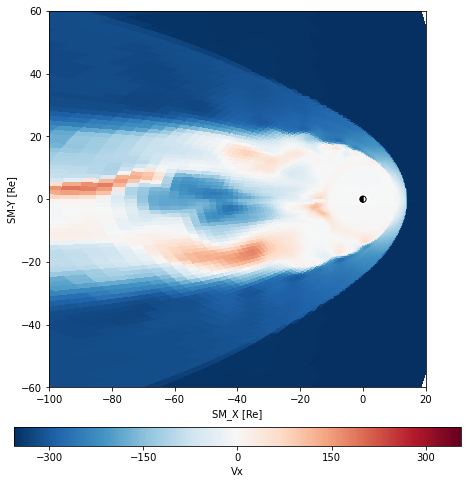

In [7]:
figSz = (8,8)
fig = plt.figure(figsize=figSz)
gs = fig.add_gridspec(2,1,height_ratios=[20,1],hspace=0.2)
Ax1 = fig.add_subplot(gs[0,0])
AxC1 = fig.add_subplot(gs[1,0])
data = mviz.plotXY(gsph,nstep,xyBds,Ax1,AxC1,var='Vx',midp=True,cmap='RdBu_r')


## Import Ionosphere data
 
Importing the ionospheric data from REMIX follow the same format as the import of the magnetospheric data with the added requirement of specifying which hemisphere, e.g. NORTH or SOUTH, that you want to plot.

In [8]:
mixFiles = fdir+"/%s.mix.h5"%(ftag)
ion = remix.remix(mixFiles,nstep)
ion.init_vars('NORTH')

## Plot the ionospheric data

The mix object includes extensive plotting routine that has the capability for numerous varibles with excellent choices for the color tables. It also takes advantage of the mix objects ability to calculate dervied quanties, such as magnetic perturbations and electric fields.  Unlike the magnetosphere plotting routines it has option to take a gridspec object instead of an axes object.  It also has the option be made an inset plot so that it can be easily combined with a magnetosphere plot.

/glade/work/wiltbemj/src/kaiju/kaipy/remix/remix.py:355: MatplotlibDeprecationWarning: Passing more than one positional argument to axis() is deprecated and will raise a TypeError two minor releases later.
  ax.axis([0,2*np.pi,0,r.max()],'tight')


<PolarAxesSubplot:>

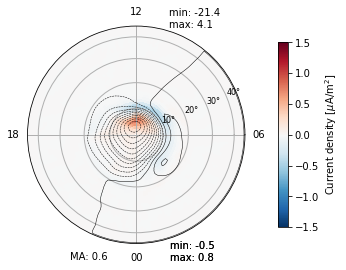

In [9]:
ion.plot('current')

The REMIX routines use a different method for specifying the min and max.  Instead of having them passed as parameters in the calling function each varaible has dictionary associated with it and you can use that to specify the min and max

<PolarAxesSubplot:>

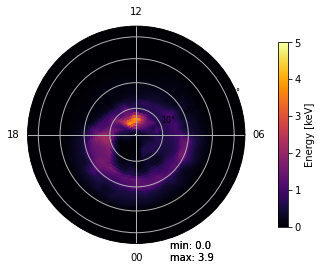

In [10]:
ion.variables['energy']['min']=0
ion.variables['energy']['max']=5
ion.plot('energy')

## Combination Plots

Do to the clever programming of the Kaiju team it is possible to combine magnetosphere and ionosphere plots into a single image.  This the essence of what is done in the msppic.py script typically used to produce diagnostic images of a GAMERA run. 

Note the utlization of gridspec and add subplot to control the location of the main plot and related colorbars.   The colorbar object is not returned by the REMIX plotting routines so their is the need to regenerate it using the calls kv.genCB.  


Reading msphere.gam/Step#121/P


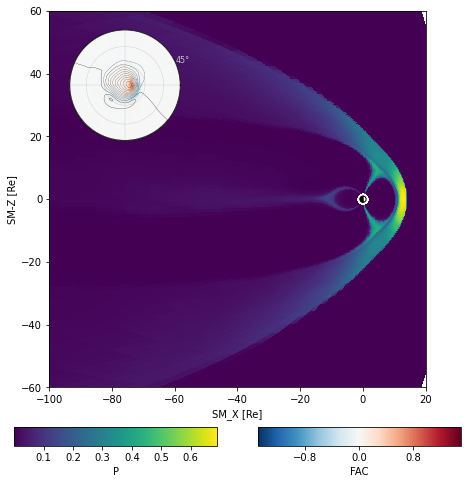

In [11]:
figSz = (8,8)
fig = plt.figure(figsize=figSz)
gs = fig.add_gridspec(2,2,height_ratios=[20,1])
Ax1 = fig.add_subplot(gs[0,:])
AxC1 = fig.add_subplot(gs[1,0])
AxC2 = fig.add_subplot(gs[1,1])
data = mviz.plotXZ(gsph,nstep,xyBds,Ax1,AxC1,var='P')
Ax1Inset = gs[0,:].subgridspec(20,20)
wXY = 6
dX = 2
dY = 1
AxIon = ion.plot('current',gs=Ax1Inset[dY:dY+wXY,dX:dX+wXY],doInset=True)
cbM = kv.genCB(AxC2,kv.genNorm(remix.facMax),"FAC",cM=remix.facCM,Ntk=4)